['EC', 'EC,EZ', 'EC,EZ,DE', 'EC,EZ,DE,MQ', 'EC,EZ,DE,MQ,DN', 'EC,EZ,DE,MQ,DN,ST', 'EC,EZ,DE,MQ,DN,ST,SC', 'EC,EZ,DE,MQ,DN,ST,SC,EP', 'EC,EZ,DE,MQ,DN,ST,SC,EP,DM']
[0.7379138002929597, 0.9999999999995827, 0.9999999999999999, 0.999971975889658, 0.001016997110276124, 0.29396692876884123, 0.48708106129146844, 0.9910549923004017]
['EC', 'EC,EP', 'EC,EP,DN', 'EC,EP,DN,SC', 'EC,EP,DN,SC,ST', 'EC,EP,DN,SC,ST,MQ', 'EC,EP,DN,SC,ST,MQ,EZ', 'EC,EP,DN,SC,ST,MQ,EZ,DM', 'EC,EP,DN,SC,ST,MQ,EZ,DM,DE']
[0.2478354880116243, 0.06222936439017838, 0.17615647223574657, 0.33909587568706645, 0.22184927871793306, 0.08214537651555763, 0.9852166841194471, 0.046596790972821565]
['EC', 'EC,SC', 'EC,SC,DN', 'EC,SC,DN,ST', 'EC,SC,DN,ST,MQ', 'EC,SC,DN,ST,MQ,DM', 'EC,SC,DN,ST,MQ,DM,EP', 'EC,SC,DN,ST,MQ,DM,EP,EZ', 'EC,SC,DN,ST,MQ,DM,EP,EZ,DE']
[0.2761881123585938, 0.3016152279008845, 0.5591326769516264, 0.38743337184088217, 0.7105505696594764, 0.08124401466567452, 0.1555559456920298, 0.3572513254745899]
['EC', 'EC,SC', 

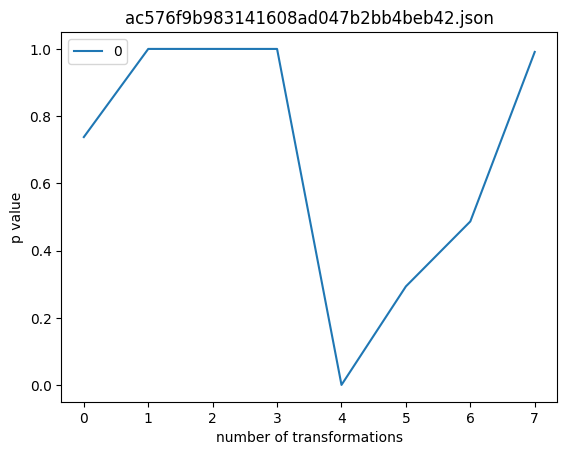

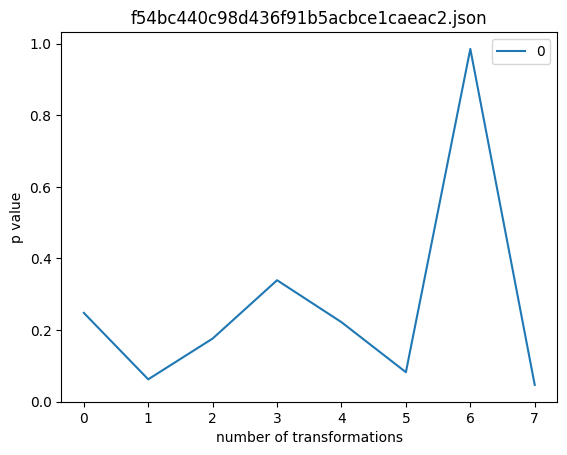

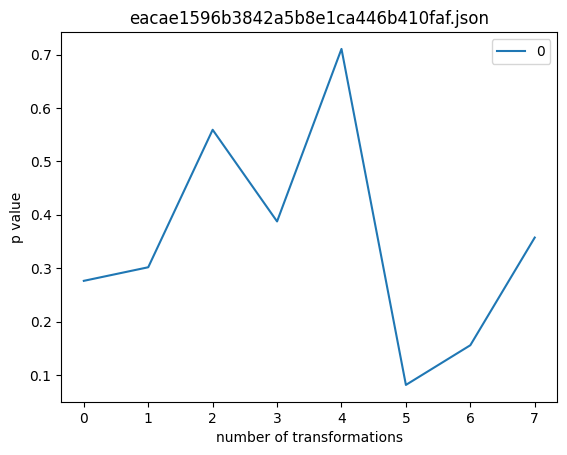

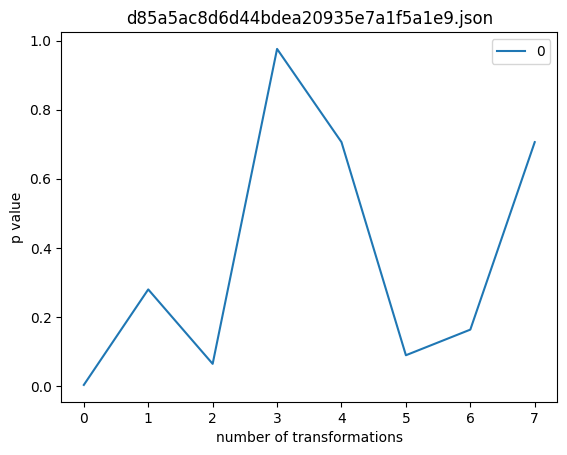

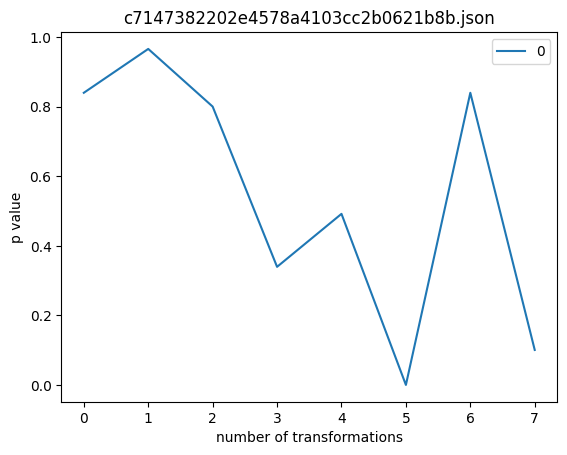

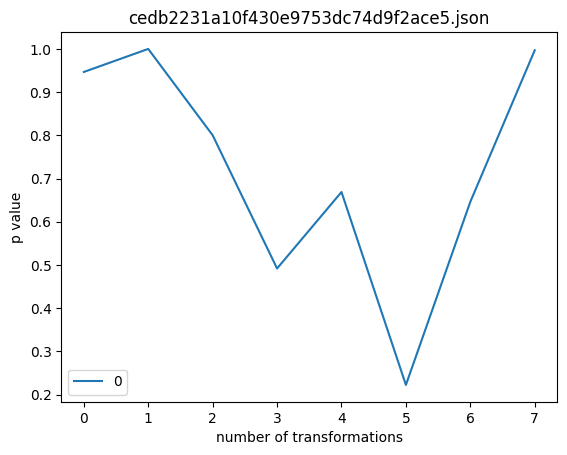

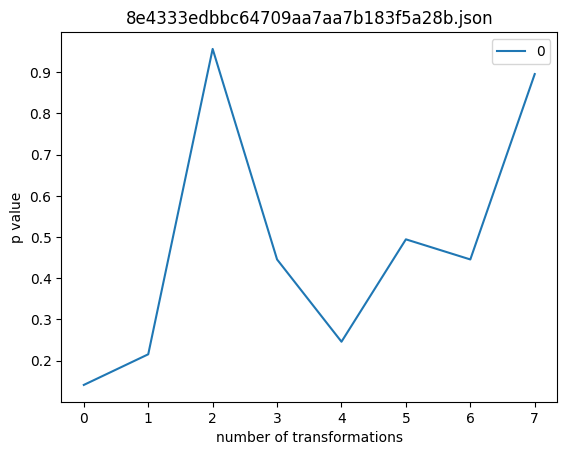

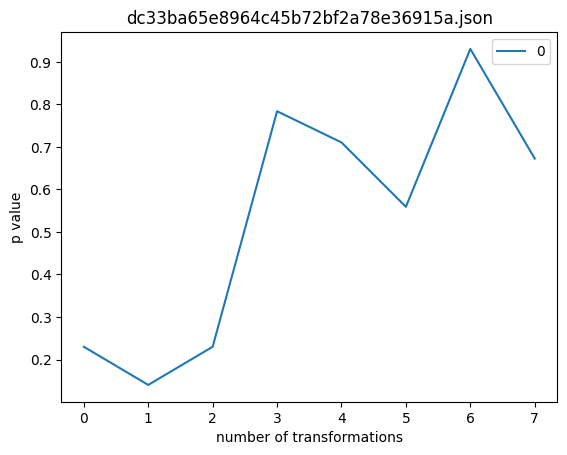

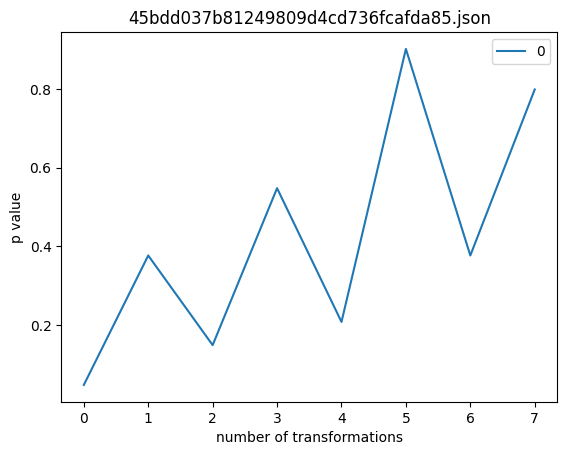

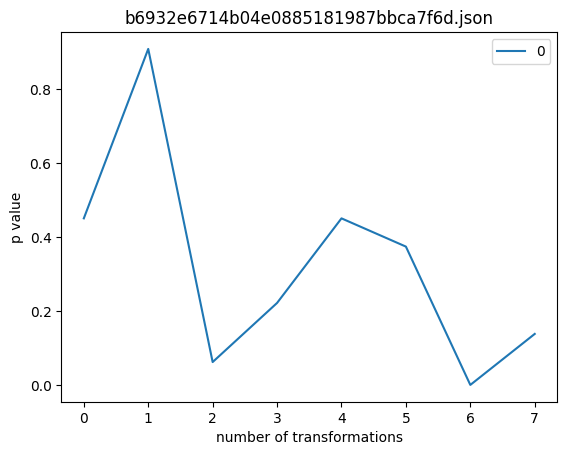

In [37]:
import pandas as pd
from divergent_files import scan_for_divergence, exec_metadata_path
from json import loads
from copy import deepcopy

short = {
            "expand_composite": "EC",
            "eject_z": "EZ",
            "merge_k_qubit_unitaries": "MQ",
            "defer_measurements": "DM",
            "stratified_circuit": "SC",
            "drop_empty_moments": "DE",
            "drop_negligible_operations": "DN",
            "synchronize_terminal_measurements": "ST",
            "eject_phased_paulis": "EP" }

def linear_subsequences(arr):
    res = []
    for i in range(1, len(arr) + 1):
        res.append(arr[0:i])
    return res

def to_pd_frame(filename):
    fullpath = exec_metadata_path + filename
    content = loads(open(fullpath).read())
    subset_metadata = content['subset_metadata']
    transformations = content['followup_metadata']['transformations_order']
    res = []
    sequences = linear_subsequences(transformations)
    short_form = [ ",".join([ short[opt] for opt in seq]) for seq in sequences]
    
    for seq in sequences:
        for key, val in subset_metadata.items():
            if val['subset'] == seq:
                sf = ",".join([ short[opt] for opt in seq])
                res.append( val['divergence_from_qiskit']['p-value'] )
    return res, short_form
        
        
for f in scan_for_divergence()['subset']:
    data, short_form = to_pd_frame(f)
    df = pd.DataFrame(data)
    plt = df.plot(kind='line')
    plt.set_title(f)
    plt.set_xlabel('number of transformations')
    plt.set_ylabel('p value')